In [1]:
from utz import *

In [2]:
%%time
from nj_crashes.sri.mp05 import get_mp05, get_mp05_map
mp05 = get_mp05()
mp05m = get_mp05_map()
mp05

CPU times: user 9.91 s, sys: 137 ms, total: 10.1 s
Wall time: 10.2 s


,SRI,MP,LON,LAT
0,09061720__,0.00,-74.040478,40.736641
1,09061720__,0.05,-74.040446,40.735928
2,09061720__,0.10,-74.040561,40.735207
3,09061720__,0.15,-74.040673,40.734481
4,09061720__,0.20,-74.040774,40.733785
...,...,...,...,...
554583,15210018__,1.10,-74.126725,39.925199
554584,15210018__,1.15,-74.125753,39.925170
554585,15210018__,1.20,-74.124795,39.925142
554586,15210018__,1.25,-74.124003,39.925121


In [3]:
from nj_crashes.sri.mp10 import get_mp10, get_mp10_map, make_mp10

In [4]:
#%%time
#make_mp10()

In [5]:
%%time
mp10 = get_mp10()
mp10m = get_mp10_map()
mp10

CPU times: user 450 ms, sys: 9.94 ms, total: 460 ms
Wall time: 467 ms


,SRI,MP,LAT,LON
18466,00000001BS,0.0,40.238610,-74.741773
18467,00000001BS,0.1,40.240074,-74.739503
18472,00000001BS,0.2,40.242223,-74.739730
18464,00000001BS,0.4,40.244703,-74.742177
18470,00000001BS,0.5,40.245579,-74.743258
...,...,...,...,...
14615,00000700__,51.5,40.097889,-74.728225
14601,00000700__,51.6,40.098976,-74.727144
14621,00000700__,51.7,40.100068,-74.726071
14585,00000700__,51.8,40.101166,-74.725013


In [6]:
len(mp05m), len(mp10m)

(34479, 291)

In [7]:
mp10[mp10.LON.isna()]

,SRI,MP,LAT,LON


In [8]:
mp05[mp05.LON.isna()]

,SRI,MP,LON,LAT


In [9]:
def lower(df):
    df = df.copy()
    df.columns = [ col.lower() for col in df.columns ]
    return df

mp05i = lower(mp05).set_index(['sri', 'mp'])
mp10i = lower(mp10).set_index(['sri', 'mp'])
m = mp05i.merge(mp10i, left_index=True, right_index=True, how='outer', suffixes=["05", "10"])
m

lon05      lat05      lat10      lon10
sri        mp                                              
00000001BS 0.00        NaN        NaN  40.238610 -74.741773
           0.10        NaN        NaN  40.240074 -74.739503
           0.20        NaN        NaN  40.242223 -74.739730
           0.40        NaN        NaN  40.244703 -74.742177
           0.50        NaN        NaN  40.245579 -74.743258
...                    ...        ...        ...        ...
21231071__ 0.15 -75.074255  40.805299        NaN        NaN
           0.20 -75.073876  40.805943        NaN        NaN
           0.25 -75.074580  40.806391        NaN        NaN
           0.30 -75.075426  40.806403        NaN        NaN
           0.35 -75.075825  40.805732        NaN        NaN

[571797 rows x 4 columns]

In [10]:
has05 = ~m.lon05.isna()
has10 = ~m.lon10.isna()
pd.crosstab(has05, has10)

lon10,False,True
lon05,,
False,0,17209
True,519080,35508


In [11]:
both = m[has05 & has10]
both

lon05      lat05      lat10      lon10
sri        mp                                              
00000001B_ 0.0  -74.740087  40.239449  40.239441 -74.740085
           0.1  -74.739083  40.240842  40.240834 -74.739081
           0.2  -74.739721  40.242357  40.242349 -74.739719
           0.3  -74.740984  40.243667  40.243659 -74.740983
           0.4  -74.742229  40.244826  40.244818 -74.742228
...                    ...        ...        ...        ...
00000700__ 51.5 -74.728227  40.097897  40.097889 -74.728225
           51.6 -74.727146  40.098984  40.098976 -74.727144
           51.7 -74.726073  40.100076  40.100068 -74.726071
           51.8 -74.725014  40.101175  40.101166 -74.725013
           51.9 -74.723954  40.102272  40.102264 -74.723953

[35508 rows x 4 columns]

In [12]:
from geopy.distance import geodesic
meters = both.apply(lambda r: geodesic((r.lat05, r.lon05), (r.lat10, r.lon10)).meters, axis=1).rename('meters')
meters

sri         mp  
00000001B_  0.0     0.914448
            0.1     0.914486
            0.2     0.914519
            0.3     0.914544
            0.4     0.914571
                      ...   
00000700__  51.5    0.899595
            51.6    0.904965
            51.7    0.918105
            51.8    0.935235
            51.9    0.911380
Name: meters, Length: 35508, dtype: float64

In [13]:
import plotly.express as px
from nj_crashes.utils import show

In [14]:
sorted_meters = meters.sort_values().reset_index(drop=True)

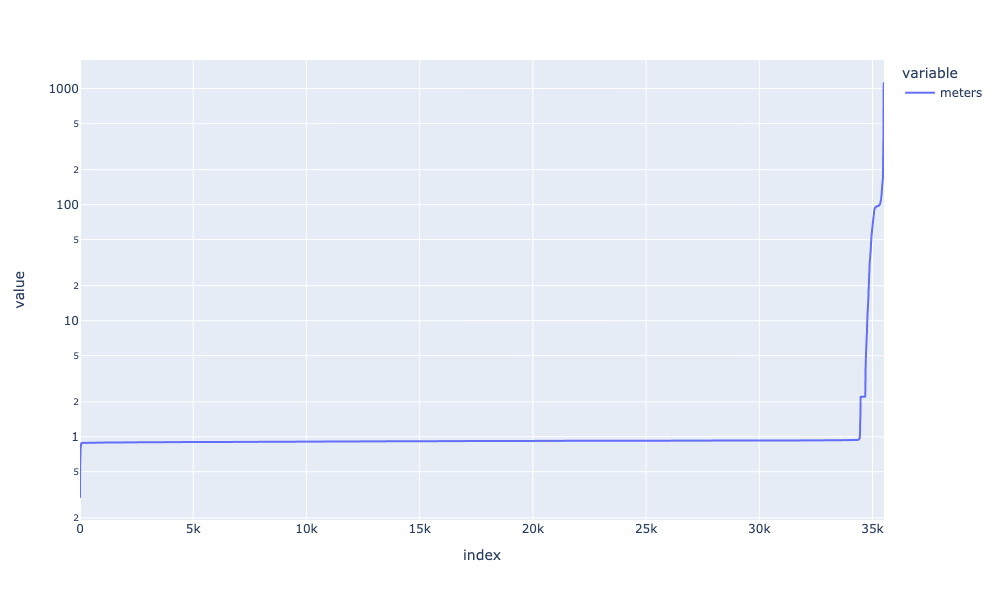

In [15]:
show(
    px.line(
        sorted_meters,
        log_y=True,
    ),
    #i=True,
)

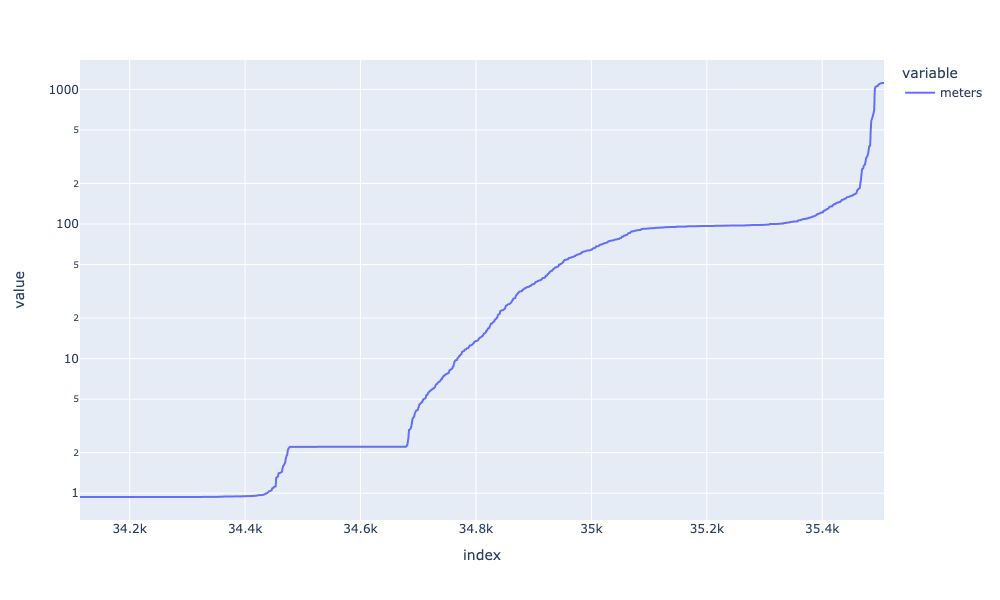

In [16]:
show(
    px.line(
        sorted_meters[sorted_meters >= 0.937],
        log_y=True,
    ),
#     i=True,
)

In [17]:
fars = sxs(both, meters)[meters >= 1]
fars

lon05      lat05      lat10      lon10     meters
sri        mp                                                         
00000003E_ 9.5  -74.052637  40.790149  40.790150 -74.052650   1.051653
00000007__ 0.0  -74.074607  40.739215  40.738769 -74.073731  89.040380
           0.0  -74.074607  40.739215  40.738769 -74.073731  89.040380
           0.0  -74.074607  40.739215  40.738769 -74.073731  89.040380
           0.1  -74.076538  40.739214  40.738727 -74.075653  92.188413
...                    ...        ...        ...        ...        ...
00000295__ 76.1 -74.841121  40.264170  40.264158 -74.841120   1.330577
           76.2 -74.842051  40.262929  40.262902 -74.842096   4.932749
           76.3 -74.843104  40.261695  40.261726 -74.843148   5.047586
           76.4 -74.844471  40.260706  40.260755 -74.844503   6.008754
           76.5 -74.845926  40.259826  40.259937 -74.846028  15.092262

[1070 rows x 5 columns]